# Importing important Libraries

In [242]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Importig Datasets

In [243]:
ds1 = pd.read_csv('S015.csv')
ds2 = pd.read_csv('S006.csv')
ds3 = pd.read_csv('S008.csv')
ds4 = pd.read_csv('S009.csv')
ds5 = pd.read_csv('S021.csv')
ds6 = pd.read_csv('S022.csv')

# Analyzing and Preprocessing Datasets

In [244]:
print(ds1.head())
print(ds2.head())
print(ds3.head())
print(ds4.head())
print(ds5.head())
print(ds6.head())

                 timestamp  index    back_x    back_y    back_z   thigh_x  \
0  2019-01-12 00:00:00.000      0 -0.999492  0.023192  0.025461 -0.935965   
1  2019-01-12 00:00:00.020      1 -0.995551  0.021414  0.042297 -0.928875   
2  2019-01-12 00:00:00.040      2 -0.989507  0.012187  0.038830 -0.942907   
3  2019-01-12 00:00:00.060      3 -0.991327  0.015926  0.056181 -0.942363   
4  2019-01-12 00:00:00.080      4 -0.997368  0.014239  0.035168 -0.930852   

    thigh_y   thigh_z  label  
0  0.023979 -0.355521      6  
1  0.029540 -0.371151      6  
2  0.019677 -0.359649      6  
3  0.009682 -0.348916      6  
4  0.012002 -0.357421      6  
                 timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0  2019-01-12 00:00:00.000 -0.760242  0.299570  0.468570 -5.092732 -0.298644   
1  2019-01-12 00:00:00.010 -0.530138  0.281880  0.319987  0.900547  0.286944   
2  2019-01-12 00:00:00.020 -1.170922  0.186353 -0.167010 -0.035442 -0.078423   
3  2019-01-12 00:00:00.030 -0.6

## Removing all unnecessary data and changing the names of the column

In [245]:
ds1 = ds1.drop("index", axis='columns')
ds1 = ds1[ds1.label != 13]
ds1 = ds1[ds1.label != 14]
ds1 = ds1[ds1.label != 140]
ds1 = ds1[ds1.label != 130]
ds1 = ds1[ds1.label != 3]
ds1 = ds1[ds1.label != 8]

# ds2 = ds2.drop("index", axis='columns')
ds2 = ds2[ds2.label != 13]
ds2 = ds2[ds2.label != 130]
ds2 = ds2[ds2.label != 140]
ds2 = ds2[ds2.label != 14]
ds2 = ds2[ds2.label != 3]
ds2 = ds2[ds2.label != 8]

# ds3 = ds3.drop("index", axis='columns')
ds3 = ds3[ds3.label != 13]
ds3 = ds3[ds3.label != 130]
ds3 = ds3[ds3.label != 140]
ds3 = ds3[ds3.label != 14]
ds3 = ds3[ds3.label != 3]
ds3 = ds3[ds3.label != 8]

# ds4 = ds4.drop("index", axis='columns')
ds4 = ds4[ds4.label != 13]
ds4 = ds4[ds4.label != 130]
ds4 = ds4[ds4.label != 140]
ds4 = ds4[ds4.label != 14]
ds4 = ds4[ds4.label != 3]
ds4 = ds4[ds4.label != 8]

ds5 = ds5.drop("index", axis='columns')
ds5 = ds5[ds5.label != 13]
ds5 = ds5[ds5.label != 130]
ds5 = ds5[ds5.label != 140]
ds5 = ds5[ds5.label != 14]
ds5 = ds5[ds5.label != 3]
ds5 = ds5[ds5.label != 8]

# ds6 = ds6.drop("index", axis='columns')
ds6 = ds6[ds6.label != 13]
ds6 = ds6[ds6.label != 130]
ds6 = ds6[ds6.label != 140]
ds6 = ds6[ds6.label != 14]
ds6 = ds6[ds6.label != 3]
ds6 = ds6[ds6.label != 8]

In [246]:
label_mapping = {1: 1, 2: 2, 4: 3, 5: 4, 6: 5, 7: 6}
ds1['label'] = ds1['label'].map(label_mapping)
ds2['label'] = ds2['label'].map(label_mapping)
ds3['label'] = ds3['label'].map(label_mapping)
ds4['label'] = ds4['label'].map(label_mapping)
ds5['label'] = ds5['label'].map(label_mapping)
ds6['label'] = ds6['label'].map(label_mapping)

In [247]:
print(ds1['label'].value_counts())
print(ds2['label'].value_counts())
print(ds3['label'].value_counts())
print(ds4['label'].value_counts())
print(ds5['label'].value_counts())
print(ds6['label'].value_counts())

label
6    195040
5     67302
1     55022
3      7066
4      6626
2      2946
Name: count, dtype: int64
label
6    253029
5     62682
1     24889
4      1550
3      1370
Name: count, dtype: int64
label
6    292812
5     65222
1     21454
4       750
3       708
Name: count, dtype: int64
label
5    6080
1    5676
4     560
3     448
Name: count, dtype: int64
label
6    168266
1     47896
5     40388
2      3760
3      3354
4      1658
Name: count, dtype: int64
label
6    140704
1     73030
5     59572
3      5282
4      4976
2      2334
Name: count, dtype: int64


In [248]:
ds0 = pd.concat([ds1, ds2, ds3, ds4])
ds0.dtypes

timestamp     object
back_x       float64
back_y       float64
back_z       float64
thigh_x      float64
thigh_y      float64
thigh_z      float64
label          int64
dtype: object

In [249]:
ds0['label'].value_counts()

label
6    740881
5    201286
1    107041
3      9592
4      9486
2      2946
Name: count, dtype: int64

## Bringing Data Balance

In [250]:
ds_1 = ds0[ds0['label'] == 1]
ds_6 = ds0[ds0['label'] == 6]
ds_5 = ds0[ds0['label'] == 5]
ds_2 = ds0[ds0['label'] == 2]
ds_3 = ds0[ds0['label'] == 3]
ds_4 = ds0[ds0['label'] == 4]

ds_1 = ds_1.head(9000)
ds_6 = ds_6.head(9000)
ds_5 = ds_5.head(9000)

ds0 = pd.concat([ds_1, ds_6, ds_5, ds_3, ds_4])

ds0['label'].value_counts()

label
3    9592
4    9486
1    9000
6    9000
5    9000
Name: count, dtype: int64

## Transformig Timestamp into readable form

In [251]:
# 2019-01-12 00:00:00.000
ds0['timestamp'] = ds0['timestamp'].apply(lambda x: x.split(' '))
ds0['timestamp'] = ds0['timestamp'].apply(lambda x: x[1])
ds0['timestamp'] = ds0['timestamp'].apply(lambda x:[i.replace(":", "") for i in x])
ds0['timestamp'] = ds0['timestamp'].apply(lambda x:[i.replace(".", "") for i in x])
ds0['timestamp'] = ds0['timestamp'].apply(lambda x:"".join(x))

ds0['timestamp'] = pd.DataFrame(ds0['timestamp'])
ds0['timestamp'].describe()

count         46078
unique        45676
top       000013940
freq              2
Name: timestamp, dtype: object

In [252]:
ds0.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,46078.000000,46078.000000,46078.000000,46078.000000,46078.000000,46078.000000,46078.000000
mean,-0.986663,0.006632,0.063363,-0.888912,0.060415,0.108038,3.791831
std,0.212678,0.125463,0.187051,0.465123,0.291232,0.553536,1.702760
min,-5.238408,-1.277704,-0.849446,-6.863094,-3.397966,-5.651375,1.000000
25%,-1.008379,-0.050185,-0.018132,-1.039055,-0.044076,-0.297367,3.000000
50%,-0.990093,0.015203,0.022559,-0.938527,0.041699,-0.047430,4.000000
75%,-0.915011,0.080470,0.149264,-0.429131,0.154149,0.593853,5.000000
max,0.858455,1.112373,4.909483,2.602681,3.868929,4.066489,6.000000


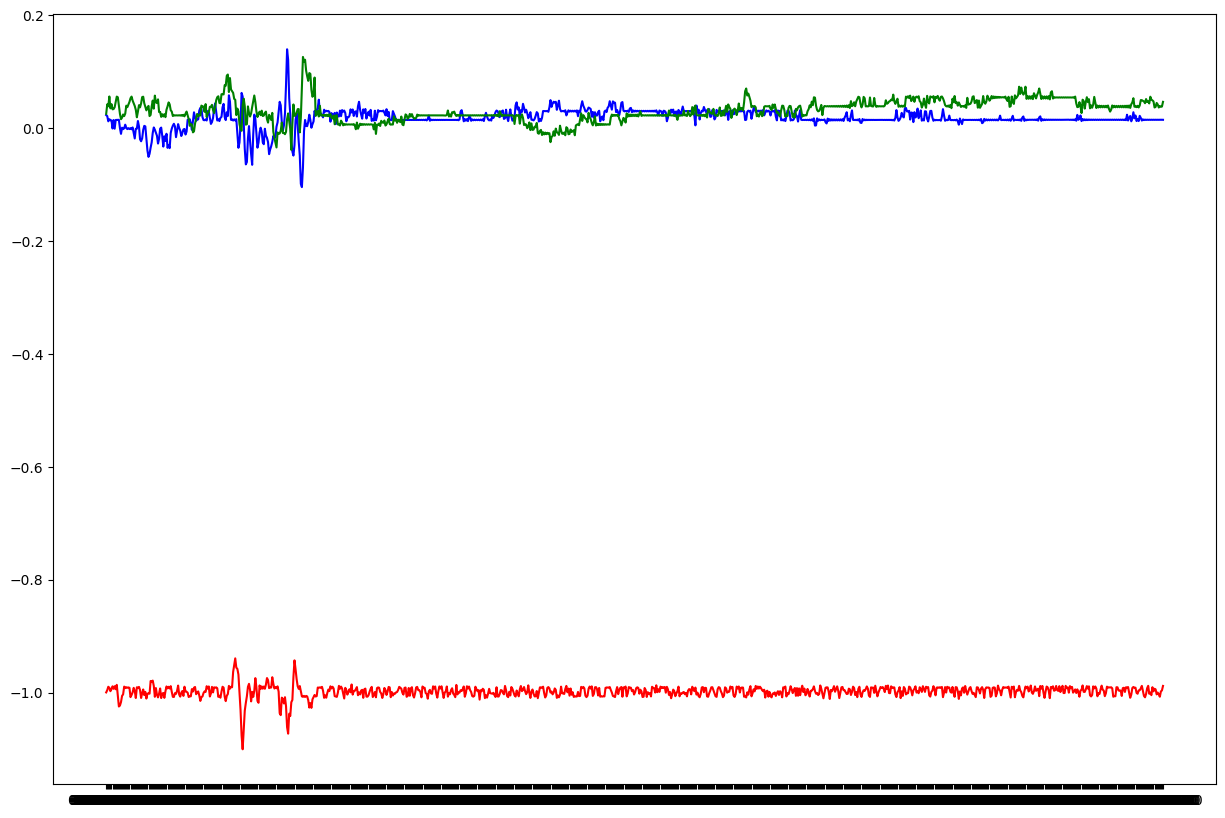

In [253]:
ds_standing = ds0[ds0['label'] == 5].head(1000)

plt.figure(figsize=(15, 10))

plt.plot(ds_standing['timestamp'],ds_standing['back_x'], color='red')
plt.plot(ds_standing['timestamp'],ds_standing['back_y'], color='blue')
plt.plot(ds_standing['timestamp'],ds_standing['back_z'], color='green')

plt.show()

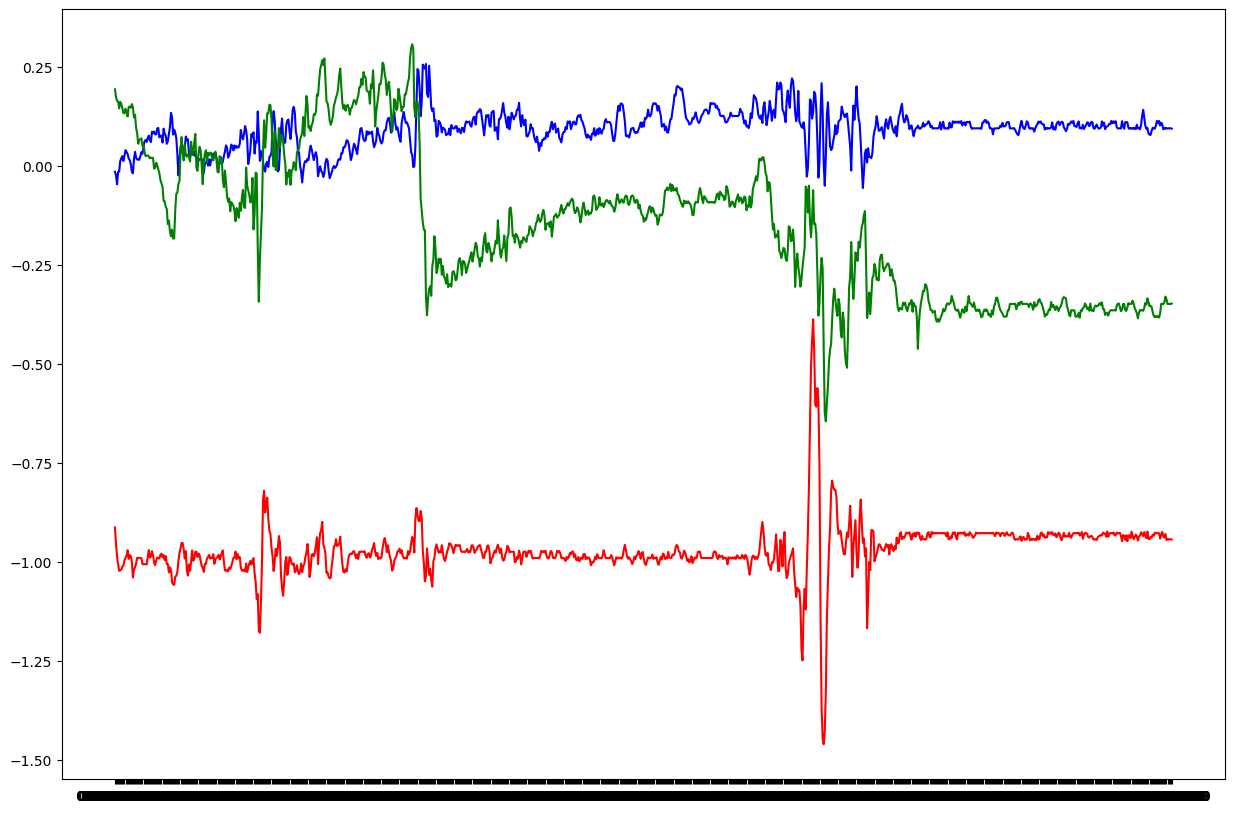

In [254]:
ds_sitting = ds0[ds0['label'] == 6].head(1000)

plt.figure(figsize=(15, 10))

plt.plot(ds_sitting['timestamp'],ds_sitting['back_x'], color='red')
plt.plot(ds_sitting['timestamp'],ds_sitting['back_y'], color='blue')
plt.plot(ds_sitting['timestamp'],ds_sitting['back_z'], color='green')

plt.show()

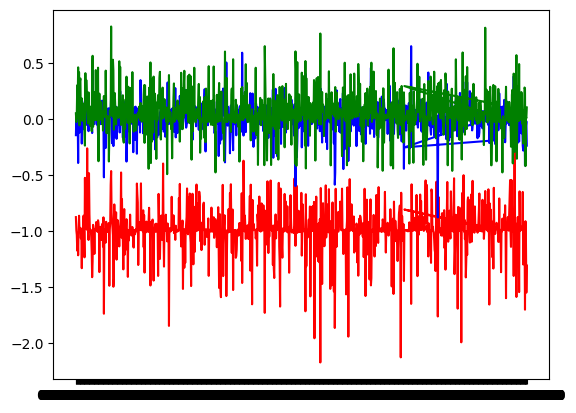

In [255]:
ds_1000 = ds0.sample(n=1000, random_state=42)

plt.plot(ds_1000['timestamp'],ds_1000['back_x'], color='red')
plt.plot(ds_1000['timestamp'],ds_1000['back_y'], color='blue')
plt.plot(ds_1000['timestamp'],ds_1000['back_z'], color='green')

plt.show()

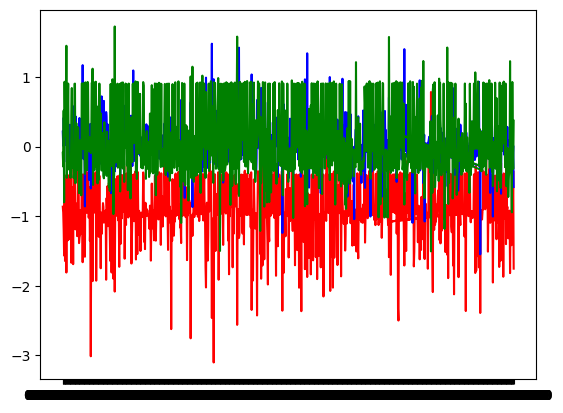

In [256]:
ds_1000 = ds0.sample(n=1000, random_state=42)

plt.plot(ds_1000['timestamp'],ds_1000['thigh_x'], color='red')
plt.plot(ds_1000['timestamp'],ds_1000['thigh_y'], color='blue')
plt.plot(ds_1000['timestamp'],ds_1000['thigh_z'], color='green')

plt.show()

In [257]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data
# x = np.random.rand(5000)
# y = np.random.rand(5000)
# label = np.random.randint(1, 8, 5000)

# # Create a scatter plot
# fig, ax = plt.subplots()

# # Plot the data
# sc = ax.scatter(x, y, c=label, cmap='viridis', alpha=0.6)

# # Add different background colors for specified regions
# # Highlight vertical regions between x = 0.2 to 0.4 and x = 0.6 to 0.8
# ax.axvspan(0.2, 0.4, facecolor='lightblue', alpha=0.3)
# ax.axvspan(0.2, 0.4, facecolor='lightblue', alpha=0.3)
# ax.axvspan(0.2, 0.4, facecolor='lightblue', alpha=0.3)
# ax.axvspan(0.2, 0.4, facecolor='lightblue', alpha=0.3)
# ax.axvspan(0.2, 0.4, facecolor='lightblue', alpha=0.3)
# ax.axvspan(0.6, 0.8, facecolor='green', alpha=0.3)

# # Adding labels and title
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Variations')
# ax.set_title('Plot with custom region background colors')

# # Adding color bar
# cbar = plt.colorbar(sc)
# cbar.set_label('Label')

# plt.show()


## Test Train Split

In [258]:
X = ds0.iloc[:, 1:-1].values
y = ds0.iloc[:, -1].values

In [259]:
from sklearn.preprocessing import OneHotEncoder
y = y.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 73)

## Feature Scaling

In [261]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [262]:
y_test[2]

array([0., 0., 0., 1., 0.])

In [263]:
X_test[0]

array([-0.96799115,  0.56969269, -0.87914618,  0.60223013,  3.53480596,
       -0.3685906 ])

# Model

## 1) ANN

In [264]:
from tensorflow.keras.models import Sequential

model = Sequential([
    keras.layers.Dense(units=5, activation='relu'),
    keras.layers.Dense(units=12, activation='relu'),
    keras.layers.Dense(units=5, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
1152/1152 [==============================] - 3s 2ms/step - loss: 1.0436 - accuracy: 0.5670
Epoch 2/15
1152/1152 [==============================] - 3s 2ms/step - loss: 0.7688 - accuracy: 0.6618
Epoch 3/15
1152/1152 [==============================] - 3s 2ms/step - loss: 0.7209 - accuracy: 0.6904
Epoch 4/15
1152/1152 [==============================] - 4s 4ms/step - loss: 0.7031 - accuracy: 0.6997
Epoch 5/15
1152/1152 [==============================] - 4s 3ms/step - loss: 0.6945 - accuracy: 0.7032
Epoch 6/15
1152/1152 [==============================] - 3s 2ms/step - loss: 0.6890 - accuracy: 0.7051
Epoch 7/15
1152/1152 [==============================] - 3s 2ms/step - loss: 0.6856 - accuracy: 0.7077
Epoch 8/15
1152/1152 [==============================] - 2s 2ms/step - loss: 0.6826 - accuracy: 0.7086
Epoch 9/15
1152/1152 [==============================] - 3s 3ms/step - loss: 0.6797 - accuracy: 0.7090
Epoch 10/15
1152/1152 [==============================] - 4s 4ms/step - loss: 0.676

In [265]:
y_pred = model.predict(X_test)
y_pred

288/288 [==============================] - 1s 3ms/step


array([[7.9143518e-01, 9.2704123e-01, 8.3511674e-01, 1.1020201e-05,
        8.2993624e-04],
       [9.7860825e-01, 9.7762060e-01, 9.9259293e-01, 1.7881740e-13,
        3.3677281e-03],
       [3.1575260e-01, 1.6908514e-01, 2.5725520e-01, 8.6898136e-01,
        7.6413131e-03],
       ...,
       [2.4095117e-01, 3.1541869e-01, 2.4036457e-01, 2.2492670e-01,
        1.3358032e-02],
       [9.6055698e-01, 7.2653049e-01, 9.9061012e-01, 1.7029313e-14,
        8.3960067e-06],
       [9.4195086e-01, 8.4066582e-01, 9.6712548e-01, 3.4766629e-06,
        1.3666165e-07]], dtype=float32)

In [266]:
y_pred.shape

(9216, 5)

In [267]:
predicted_labels = []

for i in range(0, y_pred.shape[0]):
  predicted_labels.append(np.argmax(y_pred[i])+1)

print(predicted_labels)

[2, 3, 4, 4, 1, 1, 3, 3, 3, 3, 5, 5, 5, 2, 4, 3, 2, 2, 1, 5, 2, 3, 1, 3, 5, 3, 3, 2, 3, 4, 5, 3, 5, 2, 3, 4, 2, 4, 4, 2, 4, 4, 4, 5, 1, 3, 5, 2, 2, 3, 5, 2, 2, 2, 2, 1, 5, 4, 1, 5, 3, 2, 4, 4, 1, 3, 4, 4, 5, 1, 4, 5, 4, 4, 3, 5, 3, 3, 5, 5, 3, 3, 3, 2, 3, 4, 2, 2, 4, 3, 2, 3, 1, 1, 2, 2, 2, 4, 3, 5, 1, 4, 2, 2, 5, 4, 3, 4, 3, 2, 4, 2, 2, 1, 3, 5, 2, 2, 5, 5, 2, 2, 3, 2, 4, 3, 3, 3, 2, 3, 2, 3, 3, 4, 5, 2, 5, 5, 3, 2, 3, 2, 5, 1, 1, 2, 4, 4, 3, 3, 3, 3, 3, 5, 4, 3, 1, 1, 3, 2, 4, 3, 2, 3, 2, 5, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 4, 4, 2, 2, 3, 2, 4, 5, 2, 4, 3, 1, 2, 4, 4, 5, 5, 4, 4, 3, 4, 2, 2, 4, 5, 3, 4, 2, 3, 3, 5, 1, 3, 5, 4, 3, 5, 1, 1, 3, 4, 4, 5, 4, 4, 1, 5, 3, 3, 1, 3, 4, 3, 3, 5, 5, 3, 3, 4, 1, 3, 1, 2, 2, 3, 3, 5, 2, 4, 3, 5, 1, 5, 2, 2, 5, 2, 4, 4, 4, 1, 2, 3, 2, 1, 1, 1, 2, 2, 4, 2, 5, 3, 2, 1, 3, 4, 3, 4, 1, 4, 3, 5, 5, 5, 2, 2, 3, 5, 1, 1, 4, 2, 5, 4, 3, 3, 5, 5, 5, 5, 2, 2, 2, 3, 2, 1, 3, 3, 5, 2, 4, 5, 2, 3, 4, 1, 3, 1, 5, 2, 4, 1, 3, 5, 3, 3, 5, 2, 3, 3, 1, 5, 3, 3, 5, 3, 

In [268]:
true_labels = []

for i in range(0, y_pred.shape[0]):
  true_labels.append(np.argmax(y_test[i])+1)

print(true_labels)

[1, 3, 4, 4, 3, 1, 3, 3, 1, 3, 5, 5, 5, 2, 4, 3, 2, 3, 1, 5, 2, 3, 1, 3, 5, 1, 1, 1, 2, 4, 5, 3, 5, 2, 2, 4, 3, 4, 4, 2, 4, 4, 1, 5, 2, 1, 5, 3, 2, 3, 5, 2, 2, 2, 2, 2, 5, 1, 3, 5, 4, 2, 4, 4, 1, 3, 4, 4, 5, 2, 4, 5, 1, 4, 3, 5, 2, 1, 5, 5, 3, 3, 3, 2, 2, 4, 3, 2, 1, 1, 2, 3, 3, 1, 2, 2, 2, 4, 3, 5, 1, 4, 3, 2, 5, 4, 3, 4, 1, 3, 1, 3, 2, 4, 3, 5, 2, 2, 5, 5, 1, 3, 3, 3, 1, 3, 3, 3, 2, 3, 2, 2, 3, 4, 5, 1, 5, 5, 3, 2, 2, 3, 5, 1, 3, 2, 4, 4, 3, 3, 1, 1, 1, 5, 4, 1, 2, 1, 4, 2, 4, 3, 2, 2, 2, 5, 1, 3, 1, 4, 2, 3, 2, 2, 2, 2, 4, 4, 2, 2, 2, 1, 1, 5, 3, 4, 3, 3, 2, 4, 4, 5, 2, 4, 4, 3, 4, 2, 2, 1, 5, 1, 4, 2, 3, 3, 5, 3, 1, 5, 4, 3, 5, 1, 3, 3, 4, 4, 5, 4, 4, 4, 5, 3, 1, 2, 3, 4, 3, 1, 5, 5, 3, 1, 4, 2, 3, 1, 2, 3, 3, 3, 5, 2, 4, 3, 5, 3, 5, 2, 2, 5, 2, 4, 4, 4, 3, 3, 3, 1, 2, 1, 1, 2, 1, 4, 4, 5, 1, 2, 1, 2, 1, 3, 4, 2, 4, 3, 5, 5, 5, 1, 2, 1, 5, 1, 1, 4, 1, 5, 4, 3, 3, 5, 5, 5, 5, 2, 2, 2, 3, 2, 1, 3, 1, 5, 2, 4, 5, 2, 3, 4, 3, 3, 4, 5, 2, 4, 1, 1, 5, 3, 3, 5, 1, 3, 2, 2, 5, 1, 1, 5, 3, 

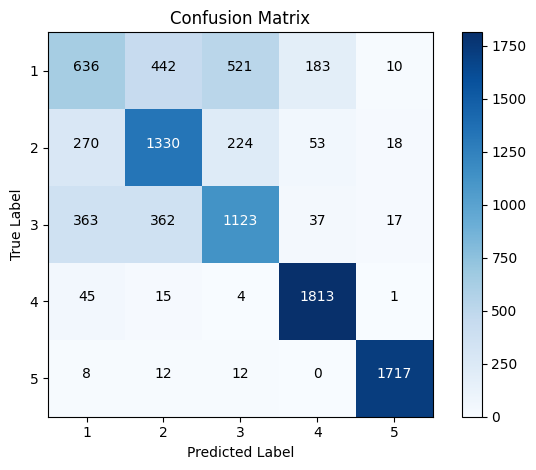

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[1, 2, 3, 4, 5])

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len([1, 2, 3, 4, 5]))
plt.xticks(tick_marks, [1, 2, 3, 4, 5])
plt.yticks(tick_marks, [1, 2, 3, 4, 5])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [270]:
ds0['label'].value_counts()

label
3    9592
4    9486
1    9000
6    9000
5    9000
Name: count, dtype: int64

In [271]:
ds5.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,265322.000000,265322.000000,265322.000000,265322.000000,265322.000000,265322.000000,265322.000000
mean,-1.010344,0.005972,-0.042670,-0.498691,0.167452,0.519593,4.838068
std,0.196353,0.121137,0.241713,0.495716,0.228803,0.625098,1.918507
min,-4.800855,-2.195478,-0.944431,-6.838976,-3.412234,-3.335828,1.000000
25%,-1.031798,-0.030614,-0.188102,-0.924453,0.065090,-0.145244,5.000000
50%,-1.027803,0.002039,-0.080799,-0.303923,0.148649,0.914529,6.000000
75%,-0.999799,0.040657,0.085853,-0.222477,0.267859,0.948137,6.000000
max,1.253294,1.488100,2.469329,2.279510,4.632514,3.987468,6.000000


In [272]:
ds6.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,285898.000000,285898.000000,285898.000000,285898.000000,285898.000000,285898.000000,285898.000000
mean,-0.974985,-0.077635,-0.085259,-0.651820,-0.028420,0.406405,4.391538
std,0.191156,0.105675,0.218595,0.476178,0.219933,0.616208,2.091356
min,-4.129828,-2.815304,-2.179715,-5.774578,-4.697262,-4.966474,1.000000
25%,-0.993492,-0.111623,-0.216589,-0.975035,-0.096333,-0.194191,1.000000
50%,-0.991693,-0.071768,-0.035286,-0.384747,-0.044588,0.871579,5.000000
75%,-0.959631,-0.038792,0.087341,-0.273519,0.057794,0.946446,6.000000
max,0.769492,1.654016,1.422140,4.586190,3.102282,4.060093,6.000000


In [273]:
ds5['label'].value_counts()

label
6    168266
1     47896
5     40388
2      3760
3      3354
4      1658
Name: count, dtype: int64

In [274]:
ds6['label'].value_counts()

label
6    140704
1     73030
5     59572
3      5282
4      4976
2      2334
Name: count, dtype: int64

In [275]:
ds5 = ds5[ds5.label != 2]
ds5['label'].value_counts()

label
6    168266
1     47896
5     40388
3      3354
4      1658
Name: count, dtype: int64

In [276]:
ds6 = ds6[ds6.label != 2]
ds6['label'].value_counts()

label
6    140704
1     73030
5     59572
3      5282
4      4976
Name: count, dtype: int64

In [277]:
df = pd.concat([ds5, ds6])
df['label'].value_counts()

label
6    308970
1    120926
5     99960
3      8636
4      6634
Name: count, dtype: int64

In [278]:
ds_1 = df[df['label'] == 1]
ds_6 = df[df['label'] == 6]
ds_5 = df[df['label'] == 5]
ds_2 = df[df['label'] == 2]
ds_3 = df[df['label'] == 3]
ds_4 = df[df['label'] == 4]

ds_1 = ds_1.head(7000)
ds_6 = ds_6.head(7000)
ds_5 = ds_5.head(7000)

df = pd.concat([ds_1, ds_6, ds_5, ds_3, ds_4])

df['label'].value_counts()

label
3    8636
1    7000
6    7000
5    7000
4    6634
Name: count, dtype: int64

In [279]:
X_2 = df.iloc[:, 1:-1].values
y_2 = df.iloc[:, -1].values

In [280]:
from sklearn.preprocessing import OneHotEncoder
y_2 = y_2.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)
y_2 = encoder.fit_transform(y_2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [281]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_2 = sc.fit_transform(X_2)

In [282]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 73)

In [283]:
y[0]

array([1., 0., 0., 0., 0.])

In [284]:
y_2[0]

array([1., 0., 0., 0., 0.])

In [285]:
model.fit(X_train_2, y_train_2, epochs=15, batch_size=32)

Epoch 1/15
794/794 [==============================] - 2s 2ms/step - loss: 0.7278 - accuracy: 0.6979
Epoch 2/15
794/794 [==============================] - 2s 2ms/step - loss: 0.6293 - accuracy: 0.7419
Epoch 3/15
794/794 [==============================] - 2s 2ms/step - loss: 0.6108 - accuracy: 0.7494
Epoch 4/15
794/794 [==============================] - 2s 2ms/step - loss: 0.6005 - accuracy: 0.7541
Epoch 5/15
794/794 [==============================] - 2s 3ms/step - loss: 0.5927 - accuracy: 0.7581
Epoch 6/15
794/794 [==============================] - 3s 4ms/step - loss: 0.5869 - accuracy: 0.7582
Epoch 7/15
794/794 [==============================] - 3s 4ms/step - loss: 0.5823 - accuracy: 0.7617
Epoch 8/15
794/794 [==============================] - 2s 2ms/step - loss: 0.5788 - accuracy: 0.7630
Epoch 9/15
794/794 [==============================] - 2s 2ms/step - loss: 0.5751 - accuracy: 0.7651
Epoch 10/15
794/794 [==============================] - 2s 2ms/step - loss: 0.5726 - accuracy: 0.7658

In [286]:
y_pred_2 = model.predict(X_test_2)
y_pred_2

341/341 [==============================] - 1s 2ms/step


array([[9.84333575e-01, 3.33533794e-01, 9.46919918e-01, 2.55789468e-03,
        2.01227203e-15],
       [9.41617131e-01, 9.37925875e-01, 7.77554274e-01, 1.62439192e-05,
        8.41011538e-10],
       [7.01548457e-01, 6.76863551e-01, 5.71087539e-01, 4.21163067e-03,
        7.33482466e-08],
       ...,
       [8.11634660e-01, 5.80476820e-01, 4.13878113e-01, 6.37159646e-02,
        6.20668925e-06],
       [2.66288669e-04, 7.03877658e-02, 2.50880551e-02, 3.34176468e-03,
        9.73840594e-01],
       [2.39979289e-03, 5.03395021e-01, 2.09327325e-01, 1.15658884e-04,
        2.54434281e-06]], dtype=float32)

In [287]:
predicted_labels_2 = []

for i in range(0, y_pred_2.shape[0]):
  predicted_labels_2.append(np.argmax(y_pred_2[i])+1)

print(predicted_labels_2)

true_labels_2 = []

for i in range(0, y_test_2.shape[0]):
  true_labels_2.append(np.argmax(y_test_2[i])+1)

print(true_labels_2)

[1, 1, 1, 4, 1, 5, 2, 1, 1, 2, 3, 2, 2, 2, 3, 5, 4, 5, 1, 3, 3, 5, 3, 1, 1, 2, 5, 4, 5, 5, 4, 1, 5, 2, 5, 1, 5, 1, 1, 3, 5, 5, 1, 2, 5, 4, 3, 3, 2, 2, 3, 2, 5, 1, 1, 5, 4, 4, 3, 4, 2, 2, 5, 1, 2, 1, 1, 5, 2, 4, 5, 4, 4, 4, 4, 4, 3, 2, 4, 5, 5, 1, 1, 5, 4, 5, 1, 2, 3, 3, 3, 1, 4, 4, 2, 2, 2, 4, 1, 1, 1, 4, 2, 1, 3, 4, 1, 3, 2, 1, 3, 3, 2, 2, 2, 4, 5, 5, 1, 2, 1, 5, 1, 2, 4, 4, 5, 1, 3, 4, 5, 1, 4, 4, 4, 4, 5, 5, 3, 5, 1, 4, 3, 4, 2, 1, 1, 4, 3, 3, 5, 2, 2, 4, 3, 2, 4, 4, 5, 2, 4, 4, 4, 4, 1, 2, 2, 2, 2, 3, 3, 3, 1, 2, 5, 2, 3, 4, 2, 2, 5, 2, 2, 2, 1, 4, 2, 1, 2, 3, 3, 2, 5, 2, 3, 1, 5, 1, 1, 4, 2, 5, 3, 4, 1, 3, 4, 2, 4, 5, 3, 4, 2, 1, 1, 2, 4, 1, 5, 1, 1, 1, 1, 5, 1, 2, 2, 3, 1, 1, 5, 5, 1, 4, 4, 5, 4, 1, 5, 5, 4, 1, 2, 5, 5, 1, 5, 4, 2, 3, 4, 4, 3, 2, 2, 2, 5, 3, 5, 2, 4, 4, 4, 1, 3, 2, 4, 2, 2, 4, 3, 2, 1, 2, 5, 3, 3, 4, 1, 4, 4, 1, 4, 4, 1, 4, 1, 2, 4, 5, 2, 5, 1, 4, 5, 2, 3, 2, 3, 4, 2, 4, 4, 5, 5, 5, 1, 1, 5, 1, 2, 2, 2, 2, 4, 4, 1, 1, 2, 3, 2, 5, 1, 1, 4, 5, 2, 2, 4, 5, 5, 2, 4, 

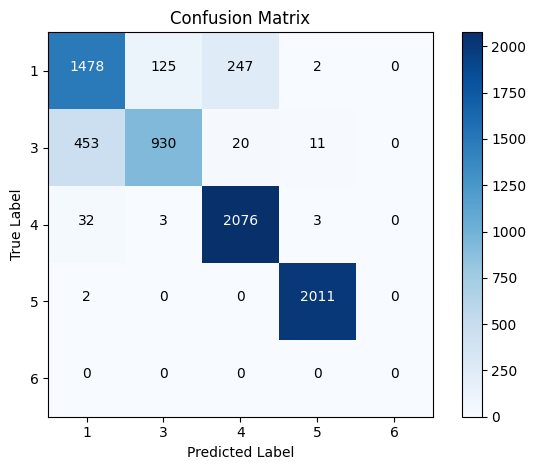

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels_2, predicted_labels_2, labels=[1, 3, 4, 5, 6])

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len([1, 3, 4, 5, 6]))
plt.xticks(tick_marks, [1, 3, 4, 5, 6])
plt.yticks(tick_marks, [1, 3, 4, 5, 6])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

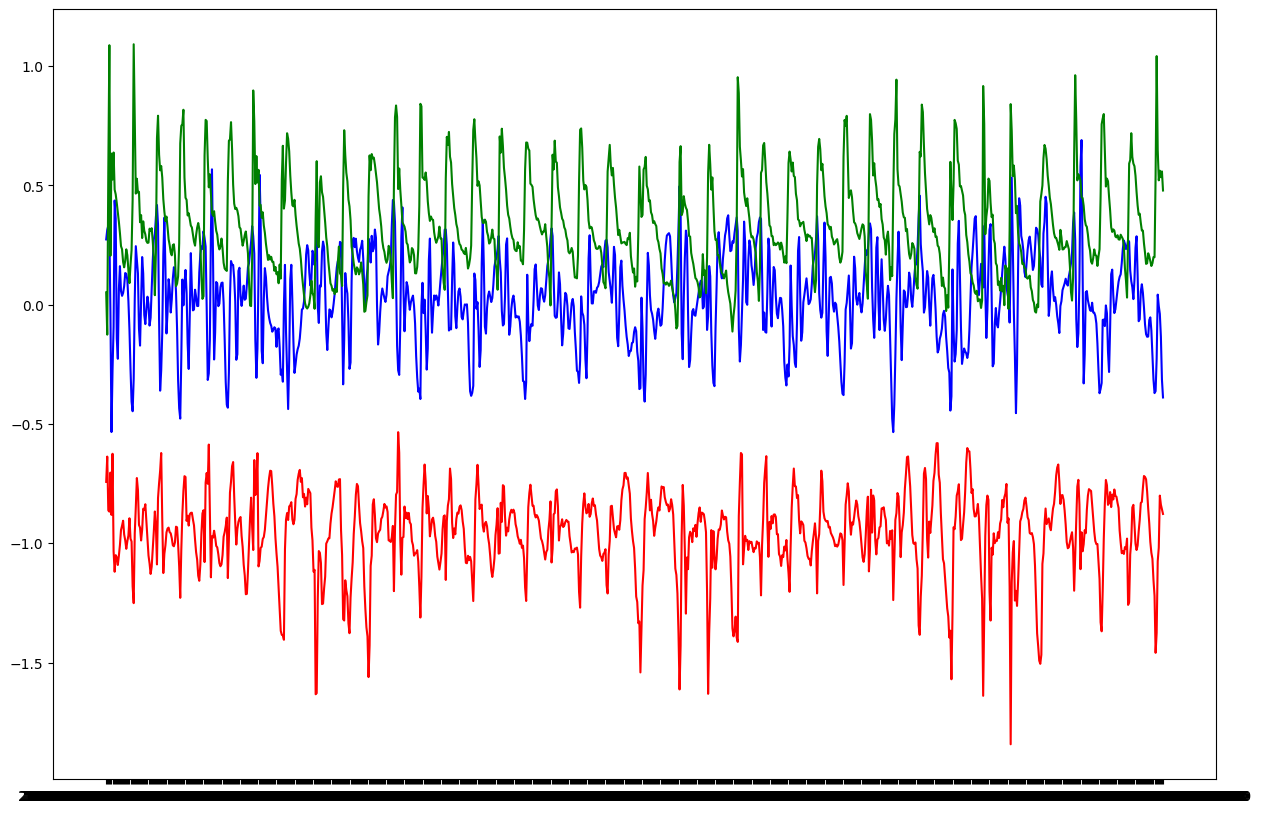

In [289]:
df_3 = df[df['label'] == 3].head(1000)

plt.figure(figsize=(15, 10))

plt.plot(df_3['timestamp'],df_3['back_x'], color='red')
plt.plot(df_3['timestamp'],df_3['back_y'], color='blue')
plt.plot(df_3['timestamp'],df_3['back_z'], color='green')

plt.show()

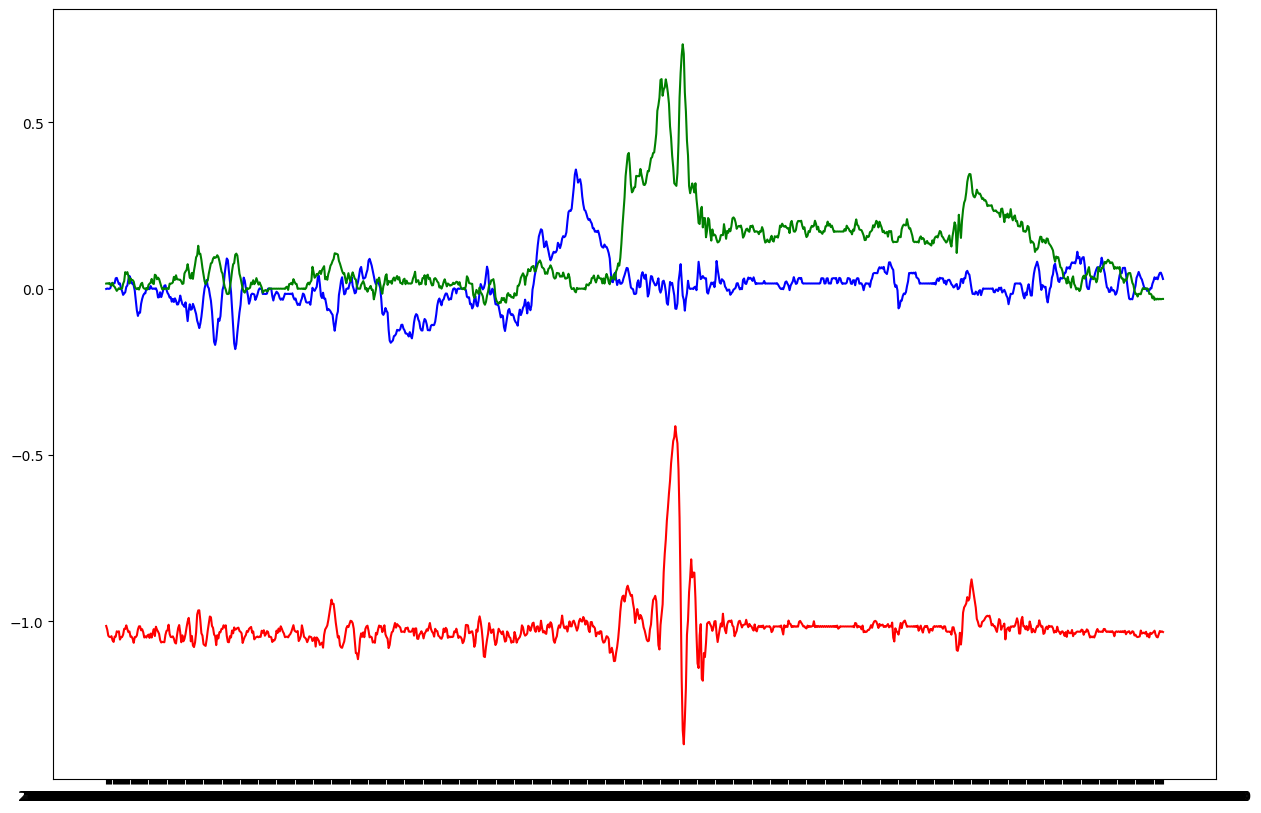

In [290]:
df_6 = df[df['label'] == 6].head(1000)

plt.figure(figsize=(15, 10))

plt.plot(df_6['timestamp'],df_6['back_x'], color='red')
plt.plot(df_6['timestamp'],df_6['back_y'], color='blue')
plt.plot(df_6['timestamp'],df_6['back_z'], color='green')

plt.show()

In [291]:
db0 = pd.read_csv('S028.csv')
db1 = pd.read_csv('S029.csv')

In [292]:
db0 = db0.drop("timestamp", axis='columns')
db1 = db1.drop("timestamp", axis='columns')

In [293]:
db = pd.concat([db0, db1])

In [294]:
db['label'].value_counts()

label
1      269318
6       20652
2       17774
13      10443
3        7783
8        6494
7        6146
5        2252
130      1590
4        1442
Name: count, dtype: int64

In [295]:
db = db[db.label != 13]
db = db[db.label != 14]
db = db[db.label != 140]
db = db[db.label != 130]
db = db[db.label != 3]
db = db[db.label != 8]
db = db[db.label != 2]

db['label'] = db['label'].map(label_mapping)

In [296]:
db['label'].value_counts()

label
1    269318
5     20652
6      6146
4      2252
3      1442
Name: count, dtype: int64

In [297]:
X_3 = db.iloc[:, :-1].values
y_3 = db.iloc[:, -1].values

In [298]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_3 = sc.fit_transform(X_3)

In [299]:
from sklearn.preprocessing import OneHotEncoder
y_3 = y_3.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)
y_3 = encoder.fit_transform(y_3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [300]:
y_pred_3 = model.predict(X_3)
y_pred_3

9370/9370 [==============================] - 25s 3ms/step


array([[1.7146926e-01, 5.0932360e-01, 3.6878058e-01, 2.7322186e-02,
        5.3022366e-05],
       [6.2972343e-01, 5.5121297e-01, 2.7019009e-01, 5.4337645e-01,
        2.6216809e-04],
       [3.9459273e-01, 3.5880023e-01, 2.4271500e-01, 8.7968498e-01,
        1.6318414e-05],
       ...,
       [1.8314516e-02, 5.1713538e-01, 1.6557877e-01, 3.0370247e-02,
        9.1286201e-06],
       [1.6821399e-02, 5.1357186e-01, 1.6323522e-01, 2.5342442e-02,
        6.2021627e-06],
       [1.3909965e-02, 5.1916379e-01, 1.6812484e-01, 1.3632405e-02,
        4.3313271e-06]], dtype=float32)

In [301]:
predicted_labels_3 = []

for i in range(0, y_pred_3.shape[0]):
  predicted_labels_3.append(np.argmax(y_pred_3[i])+1)

print(predicted_labels_3)

true_labels_3 = []

for i in range(0, y_3.shape[0]):
  true_labels_3.append(np.argmax(y_3[i])+1)

print(true_labels_3)

[2, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [302]:
a, b, c, d, e = 0, 0, 0, 0, 0

for i in true_labels_3:
  if i == 1:
    a += 1
  elif i == 3:
    b += 1
  elif i == 4:
    c += 1
  elif i == 5:
    d += 1
  elif i == 6:
    e += 1

print("count of 1's :", a)
print("count of 3's :", b)
print("count of 4's :", c)
print("count of 5's :", d)
print("count of 6's :", e)

count of 1's : 269318
count of 3's : 2252
count of 4's : 20652
count of 5's : 6146
count of 6's : 0


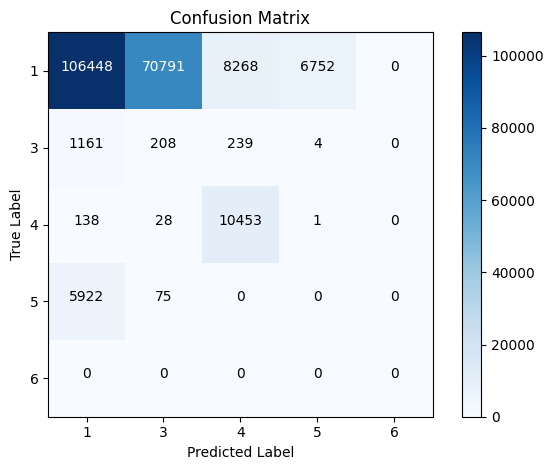

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels_3, predicted_labels_3, labels=[1, 3, 4, 5, 6])

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len([1, 3, 4, 5, 6]))
plt.xticks(tick_marks, [1, 3, 4, 5, 6])
plt.yticks(tick_marks, [1, 3, 4, 5, 6])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


# Bhai tune 2nd ko hata diya but 13456 ko 12345 ki tarah label kiya hai